In [7]:
import stompy.model.delft.dflow_model as dfm
import numpy as np
import logging
import pandas as pd
from matplotlib import dates

import xarray as xr
from stompy.grid import multi_ugrid
from stompy import utils, memoize, filters
from IPython.display import Video

import os
import six
import matplotlib.pyplot as plt
from matplotlib import colors
import run_database

%matplotlib notebook

In [8]:
scen_names={0:'Base',1:'Low',2:'Medium',3:'High'}
slr_names={0:'',0.61:'+SLR'}

def name_runs(df):
    df['name']=[scen_names[row['scen']]+slr_names[row['slr']]
                for _,row in df.iterrows()]

In [9]:
six.moves.reload_module(run_database)
all_runs=run_database.all_runs
breachruns=all_runs[(all_runs.layers==100) 
                     &(all_runs.slr==0.0) 
                     &(all_runs.period=='2016breach') 
             ].copy()
breachruns['name']=breachruns.scen.map(scen_names)
breachruns['model']=breachruns.run_dir.apply(lambda rd: dfm.DFlowModel.load(rd))
breachruns

,run_dir,scen,layers,slr,period,status,flows,name,model
28,data_2016long_3d_asbuilt_impaired_scen0_l100-v...,0,100,0.0,2016breach,completed,impaired,Base,<DFlowModel: data_2016long_3d_asbuilt_impaired...
29,data_2016long_3d_asbuilt_impaired_scen1_l100-v...,1,100,0.0,2016breach,completed,impaired,Low,<DFlowModel: data_2016long_3d_asbuilt_impaired...
30,data_2016long_3d_asbuilt_impaired_scen2_l100-v...,2,100,0.0,2016breach,completed,impaired,Medium,<DFlowModel: data_2016long_3d_asbuilt_impaired...
31,data_2016long_3d_asbuilt_impaired_scen3_l100-v...,3,100,0.0,2016breach,completed,impaired,High,<DFlowModel: data_2016long_3d_asbuilt_impaired...


In [10]:
fig_dir="fig-scenarios-20220914"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [11]:
#mod=breachruns.model.values[3]
#mds=mod.map_dataset(chain=False)

In [12]:
zoom=[552100, 553247, 4123945, 4125277] # all of N Marsh, more pond, less mouth

<IPython.core.display.Javascript object>


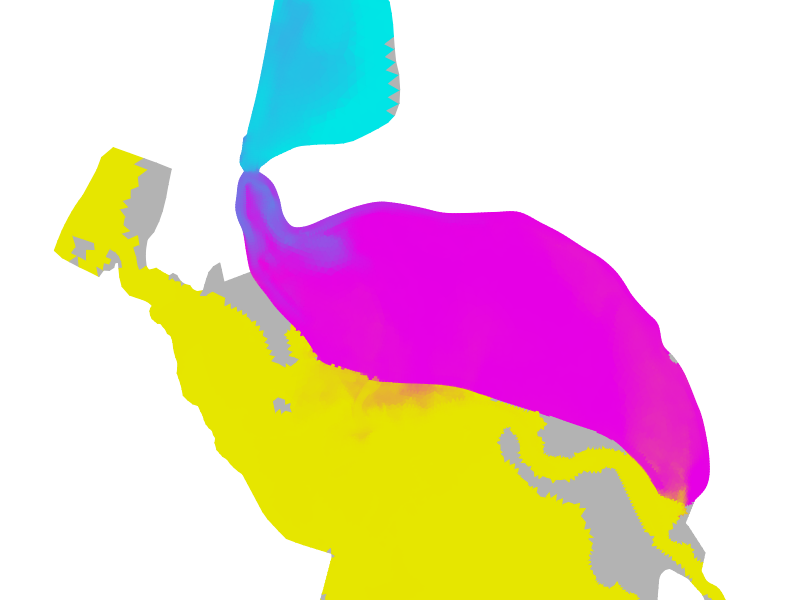

(552100.0, 553247.0, 4123945.0, 4125277.0)

In [22]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_axes([0,0,1,1])

ax.set_adjustable('datalim')
ax.axis('off')

tidx=10

snap=mds.isel(time=tidx)

marsh=np.nanmean(snap['mesh2d_marsh'].values,axis=1).clip(0,1)
pond =np.nanmean(snap['mesh2d_pond'].values,axis=1).clip(0,1)
other=(1-marsh-pond).clip(0,1)
depth=snap['mesh2d_waterdepth'].values
wet=depth>0.025
ax.axis(zoom)

In [28]:
his=mod.his_dataset()

In [28]:
import subprocess, time
def mkanim(out,patt,ffmpeg="/home/rustyh/miniconda3/envs/ffmpeg/bin/ffmpeg",fps=8):
    if os.path.exists(out):
        os.unlink(out)

    # Weird settings that work for powerpoint, and newer rendering is already 1080x720
    # -filter:v "crop=1116:952:0:0"
    process = subprocess.Popen(f"{ffmpeg} -framerate {fps} -i {patt} -c:v libx264 -preset slow -profile:v high -level:v 4.0 -pix_fmt yuv420p -crf 20 -r {fps} {out}",shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
    
    def stream_process(process):
        go = process.poll() is None
        for line in process.stdout:
            print(line.decode('ascii',errors='ignore'))
        return go

    while stream_process(process):
        time.sleep(0.1)


<IPython.core.display.Javascript object>


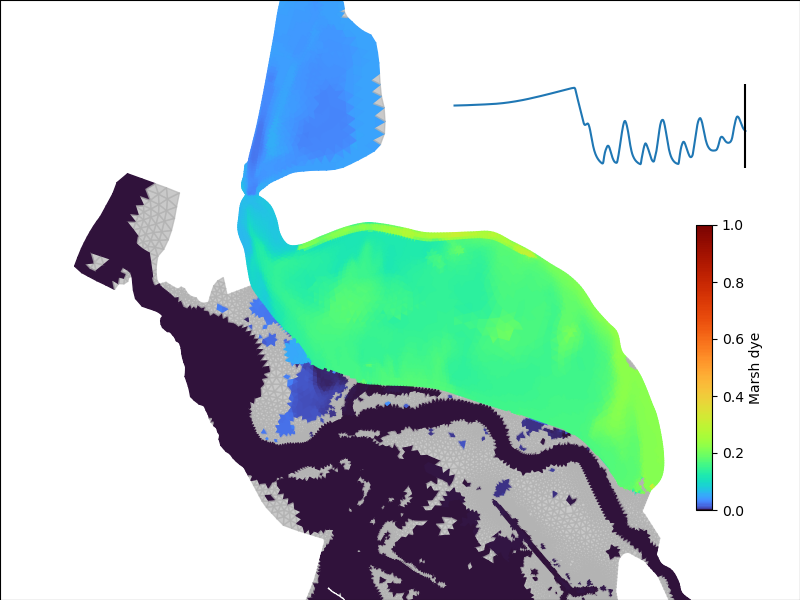

Base
ffmpeg version 5.1.1 Copyright (c) 2000-2022 the FFmpeg developers

  built with gcc 10.4.0 (conda-forge gcc 10.4.0-16)

  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1662055168074/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1662055168074/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1662055168074/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1662055168074/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1662055168074/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --ena

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


2016-12-08T00:00:00.000000000
2016-12-08T00:30:00.000000000
2016-12-08T01:00:00.000000000
2016-12-08T01:30:00.000000000
2016-12-08T02:00:00.000000000
2016-12-08T02:30:00.000000000
2016-12-08T03:00:00.000000000
2016-12-08T03:30:00.000000000
2016-12-08T04:00:00.000000000
2016-12-08T04:30:00.000000000
2016-12-08T05:00:00.000000000
2016-12-08T05:30:00.000000000
2016-12-08T06:00:00.000000000
2016-12-08T06:30:00.000000000
2016-12-08T07:00:00.000000000
2016-12-08T07:30:00.000000000
2016-12-08T08:00:00.000000000
2016-12-08T08:30:00.000000000
2016-12-08T09:00:00.000000000
2016-12-08T09:30:00.000000000
2016-12-08T10:00:00.000000000
2016-12-08T10:30:00.000000000
2016-12-08T11:00:00.000000000
2016-12-08T11:30:00.000000000
2016-12-08T12:00:00.000000000
2016-12-08T12:30:00.000000000
2016-12-08T13:00:00.000000000
2016-12-08T13:30:00.000000000
2016-12-08T14:00:00.000000000
2016-12-08T14:30:00.000000000
2016-12-08T15:00:00.000000000
2016-12-08T15:30:00.000000000
2016-12-08T16:00:00.000000000
2016-12-08

2016-12-14T14:30:00.000000000
2016-12-14T15:00:00.000000000
2016-12-14T15:30:00.000000000
2016-12-14T16:00:00.000000000
2016-12-14T16:30:00.000000000
2016-12-14T17:00:00.000000000
2016-12-14T17:30:00.000000000
2016-12-14T18:00:00.000000000
2016-12-14T18:30:00.000000000
2016-12-14T19:00:00.000000000
2016-12-14T19:30:00.000000000
2016-12-14T20:00:00.000000000
2016-12-14T20:30:00.000000000
2016-12-14T21:00:00.000000000
2016-12-14T21:30:00.000000000
2016-12-14T22:00:00.000000000
2016-12-14T22:30:00.000000000
2016-12-14T23:00:00.000000000
2016-12-14T23:30:00.000000000
2016-12-15T00:00:00.000000000
2016-12-15T00:30:00.000000000
2016-12-15T01:00:00.000000000
2016-12-15T01:30:00.000000000
2016-12-15T02:00:00.000000000
2016-12-15T02:30:00.000000000
2016-12-15T03:00:00.000000000
2016-12-15T03:30:00.000000000
2016-12-15T04:00:00.000000000
2016-12-15T04:30:00.000000000
2016-12-15T05:00:00.000000000
2016-12-15T05:30:00.000000000
2016-12-15T06:00:00.000000000
2016-12-15T06:30:00.000000000
2016-12-15

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


2016-12-08T00:00:00.000000000
2016-12-08T00:30:00.000000000
2016-12-08T01:00:00.000000000
2016-12-08T01:30:00.000000000
2016-12-08T02:00:00.000000000
2016-12-08T02:30:00.000000000
2016-12-08T03:00:00.000000000
2016-12-08T03:30:00.000000000
2016-12-08T04:00:00.000000000
2016-12-08T04:30:00.000000000
2016-12-08T05:00:00.000000000
2016-12-08T05:30:00.000000000
2016-12-08T06:00:00.000000000
2016-12-08T06:30:00.000000000
2016-12-08T07:00:00.000000000
2016-12-08T07:30:00.000000000
2016-12-08T08:00:00.000000000
2016-12-08T08:30:00.000000000
2016-12-08T09:00:00.000000000
2016-12-08T09:30:00.000000000
2016-12-08T10:00:00.000000000
2016-12-08T10:30:00.000000000
2016-12-08T11:00:00.000000000
2016-12-08T11:30:00.000000000
2016-12-08T12:00:00.000000000
2016-12-08T12:30:00.000000000
2016-12-08T13:00:00.000000000
2016-12-08T13:30:00.000000000
2016-12-08T14:00:00.000000000
2016-12-08T14:30:00.000000000
2016-12-08T15:00:00.000000000
2016-12-08T15:30:00.000000000
2016-12-08T16:00:00.000000000
2016-12-08

2016-12-13T17:00:00.000000000
2016-12-13T17:30:00.000000000
2016-12-13T18:00:00.000000000
2016-12-13T18:30:00.000000000
2016-12-13T19:00:00.000000000
2016-12-13T19:30:00.000000000
2016-12-13T20:00:00.000000000
2016-12-13T20:30:00.000000000
2016-12-13T21:00:00.000000000
2016-12-13T21:30:00.000000000
2016-12-13T22:00:00.000000000
2016-12-13T22:30:00.000000000
2016-12-13T23:00:00.000000000
2016-12-13T23:30:00.000000000
2016-12-14T00:00:00.000000000
2016-12-14T00:30:00.000000000
2016-12-14T01:00:00.000000000
2016-12-14T01:30:00.000000000
2016-12-14T02:00:00.000000000
2016-12-14T02:30:00.000000000
2016-12-14T03:00:00.000000000
2016-12-14T03:30:00.000000000
2016-12-14T04:00:00.000000000
2016-12-14T04:30:00.000000000
2016-12-14T05:00:00.000000000
2016-12-14T05:30:00.000000000
2016-12-14T06:00:00.000000000
2016-12-14T06:30:00.000000000
2016-12-14T07:00:00.000000000
2016-12-14T07:30:00.000000000
2016-12-14T08:00:00.000000000
2016-12-14T08:30:00.000000000
2016-12-14T09:00:00.000000000
2016-12-14

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


2016-12-08T00:00:00.000000000
2016-12-08T00:30:00.000000000
2016-12-08T01:00:00.000000000
2016-12-08T01:30:00.000000000
2016-12-08T02:00:00.000000000
2016-12-08T02:30:00.000000000
2016-12-08T03:00:00.000000000
2016-12-08T03:30:00.000000000
2016-12-08T04:00:00.000000000
2016-12-08T04:30:00.000000000
2016-12-08T05:00:00.000000000
2016-12-08T05:30:00.000000000
2016-12-08T06:00:00.000000000
2016-12-08T06:30:00.000000000
2016-12-08T07:00:00.000000000
2016-12-08T07:30:00.000000000
2016-12-08T08:00:00.000000000
2016-12-08T08:30:00.000000000
2016-12-08T09:00:00.000000000
2016-12-08T09:30:00.000000000
2016-12-08T10:00:00.000000000
2016-12-08T10:30:00.000000000
2016-12-08T11:00:00.000000000
2016-12-08T11:30:00.000000000
2016-12-08T12:00:00.000000000
2016-12-08T12:30:00.000000000
2016-12-08T13:00:00.000000000
2016-12-08T13:30:00.000000000
2016-12-08T14:00:00.000000000
2016-12-08T14:30:00.000000000
2016-12-08T15:00:00.000000000
2016-12-08T15:30:00.000000000
2016-12-08T16:00:00.000000000
2016-12-08

2016-12-13T17:00:00.000000000
2016-12-13T17:30:00.000000000
2016-12-13T18:00:00.000000000
2016-12-13T18:30:00.000000000
2016-12-13T19:00:00.000000000
2016-12-13T19:30:00.000000000
2016-12-13T20:00:00.000000000
2016-12-13T20:30:00.000000000
2016-12-13T21:00:00.000000000
2016-12-13T21:30:00.000000000
2016-12-13T22:00:00.000000000
2016-12-13T22:30:00.000000000
2016-12-13T23:00:00.000000000
2016-12-13T23:30:00.000000000
2016-12-14T00:00:00.000000000
2016-12-14T00:30:00.000000000
2016-12-14T01:00:00.000000000
2016-12-14T01:30:00.000000000
2016-12-14T02:00:00.000000000
2016-12-14T02:30:00.000000000
2016-12-14T03:00:00.000000000
2016-12-14T03:30:00.000000000
2016-12-14T04:00:00.000000000
2016-12-14T04:30:00.000000000
2016-12-14T05:00:00.000000000
2016-12-14T05:30:00.000000000
2016-12-14T06:00:00.000000000
2016-12-14T06:30:00.000000000
2016-12-14T07:00:00.000000000
2016-12-14T07:30:00.000000000
2016-12-14T08:00:00.000000000
2016-12-14T08:30:00.000000000
2016-12-14T09:00:00.000000000
2016-12-14

In [29]:
from matplotlib import cm
import stompy.plot.cmap as scmap

def snap_to_rgb_two_tracers(snap):
    marsh=np.nanmean(snap['mesh2d_marsh'].values,axis=1).clip(0,1)
    pond =np.nanmean(snap['mesh2d_pond'].values,axis=1).clip(0,1)
    other=(1-marsh-pond).clip(0,1)
    depth=snap['mesh2d_waterdepth'].values
    wet=depth>0.025

    cyan=other
    magenta=marsh
    yellow=pond
    black=0.0 # had been 0.1

    red=(1-cyan)*(1-black)
    green=(1-magenta)*(1-black)
    blue=(1-yellow)*(1-black)
    rgb=np.c_[red,green,blue]
    rgb[~wet,:]=0.7
    return rgb

def snap_to_rgb_marsh(snap):
    marsh=np.nanmean(snap['mesh2d_marsh'].values,axis=1).clip(0,1)
    #pond =np.nanmean(snap['mesh2d_pond'].values,axis=1).clip(0,1)
    #other=(1-marsh-pond).clip(0,1)
    depth=snap['mesh2d_waterdepth'].values
    wet=depth>0.025

    rgb=cm.turbo(marsh)
    rgb[~wet,:]=0.7
    return rgb

snap_to_rgb=snap_to_rgb_marsh
cmap=cm.turbo
cmap=scmap.cmap_transform(cmap,lambda f: f**0.5)

zoom=[552100, 553247, 4123945, 4125277] # all of N Marsh, more pond, less mouth
fig=plt.figure(figsize=(8,6))
ax=fig.add_axes([0,0,1,1])

ax.set_adjustable('datalim')
ax.axis('off')
ax_t=fig.add_axes([0.55,0.72,0.4,0.14])
ax_t.axis('off')
cax=fig.add_axes([0.87,0.15,0.02,0.475])
cbar=None
plt.setp(list(ax_t.spines.values()),visible=False)

dummy=np.zeros((2,2),np.float64)
img=ax.imshow(dummy,cmap=cmap)
img.set_clim([0,1])
cbar=plt.colorbar(img,cax=cax,label="Marsh dye")
img.set_visible(0)

anim_dir=os.path.join(fig_dir,'anim_breach3')

for _,run in breachruns.iterrows():
    print(run['name'])
    frame_dir=os.path.join(anim_dir,run['name'])
    if not os.path.exists(frame_dir):
        os.makedirs(frame_dir)
    mp4_fn=os.path.join(anim_dir,f"anim_breach-{run['name']}.mp4")
    if os.path.exists(mp4_fn):
        continue
    
    mod=run['model']
    mds=mod.map_dataset(chain=False)
    his=mod.his_dataset()
    ax.cla()
    
    ccoll=mds.grid.plot_cells(ax=ax)
    ax.axis(zoom)
    img_patt=os.path.join(frame_dir,f"frame-%04d.png")

    for tidx in range(mds.dims['time']):
        #img_fn=os.path.join(frame_dir,f"frame-{tidx:04d}.png")
        img_fn=img_patt%tidx
        if os.path.exists(img_fn):
            continue
        snap=mds.isel(time=tidx)
        print(snap.time.values)
        rgb=snap_to_rgb(snap)
        ccoll.set_color(rgb)
        ax_t.cla()
        ax_t.axis('off')
        ax_t.plot(his.time, his.waterlevel.sel(stations='nck'))
        ax_t.axvline(snap.time.values,color='k',lw=1.5)
        ax.axis(zoom)
        fig.savefig(img_fn,dpi=150)        
    mkanim(out=mp4_fn,patt=img_patt,fps=12)

In [54]:
Video(mp4_fn)